# Covid Deaths by State
Api from cdc.gov: https://data.cdc.gov/NCHS/Weekly-Provisional-Counts-of-Deaths-by-State-and-S/muzy-jte6
<br> Dataset titled: "Weekly Provisional Counts of Deaths by State and Select Causes, 2020-2021"

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def call_cdc_api():
    '''
    Get data from cdc api https://data.cdc.gov/NCHS/Weekly-Provisional-Counts-of-Deaths-by-State-and-S/muzy-jte6
    Ask for user input for state
    Return pandas data frame 
    '''
    root='https://data.cdc.gov/resource/muzy-jte6.json'
    state = input("Enter a state name: ")
    url = root + '?jurisdiction_of_occurrence=' + state
    State_data = requests.get(url)
    if(int(State_data.status_code)==200):
        json_data = json.loads(State_data.text)
        state_df = pd.DataFrame(json_data)
        return state_df
    else:
        raise Exception("Non 200 status code")

In [3]:
def clean_data():
    '''
    Drop unnessary columns, handle missing values, format columns
    Calculate percent covid death variable
    '''
    # Use call_cdc_api function to get the data
    state_df = call_cdc_api()
    
    # drop columns that are not needed
    state_df.drop(['flag_cov19ucod', 'flag_cov19mcod',  'covid_19_u071_multiple_cause_of_death', 'cerebrovascular_diseases', 'diseases_of_heart_i00_i09', 
                     'symptoms_signs_and_abnormal','nephritis_nephrotic_syndrome', 'other_diseases_of_respiratory', 'chronic_lower_respiratory', 'diabetes_mellitus_e10_e14', 
                     'malignant_neoplasms_c00_c97', 'septicemia_a40_a41', 'natural_cause', 'alzheimer_disease_g30', 'influenza_and_pneumonia_j09_j18'], axis = 1, inplace = True)    
    # change missing covid death values to 0
    state_df['covid_19_u071_underlying_cause_of_death'] = state_df['covid_19_u071_underlying_cause_of_death'].fillna(0)
    # convert columns to numeric
    state_df['covid_19_u071_underlying_cause_of_death'] = pd.to_numeric(state_df['covid_19_u071_underlying_cause_of_death'])
    state_df['all_cause'] = pd.to_numeric(state_df['all_cause'])
    # format date column
    state_df['date'] = pd.to_datetime(state_df['week_ending_date'])
    state_df.set_index("date", inplace = True)
    
    # calculate percent covid death variable (covid death/total death * 100)
    state_df['percent_covid_death'] = (state_df['covid_19_u071_underlying_cause_of_death'] / state_df['all_cause']) * 100
    # return the cleaned data frame
    return state_df

In [4]:
def plot_covid_death_for_state():
    '''
    Display graph for a specified state
    '''
    state_df = clean_data()
    
    # Display a line graph 
    plt.figure(figsize = (15,6))
    plt.title("Covid Deaths, 2020-2021)")
    plt.ylabel('Number of Deaths')
    state_df["covid_19_u071_underlying_cause_of_death"].plot()
    

## Choose a state

In [ ]:
# Run this function to get output for a specified state (i.e Pennsylvania)
plot_covid_death_for_state()


#   
#  
# Comparing the big 4 states (CA, TX, FL, NY)

In [6]:
# Looking at the 4 big states (CA, TX, FL, NY)
def get_data_for_state(state_url):
    '''
    Get data from cdc api for each state with the url for specified state
    return pandas data frame 
    '''
    try: 
        State_data = requests.get(state_url)
    except Exception as e:
        print("There was an error getting the data: ", e)
    else:    
        if State_data.status_code == 200:
            json_data = json.loads(State_data.text)
            state_df = pd.DataFrame(json_data)
            return state_df
        else:
            print("Status code is not 200")
            
def clean_data_for_state(state_url):    
    state_df = get_data_for_state(state_url)
    state_df.drop(['flag_cov19ucod', 'flag_cov19mcod',  'covid_19_u071_multiple_cause_of_death', 'cerebrovascular_diseases', 'diseases_of_heart_i00_i09', 
                     'symptoms_signs_and_abnormal','nephritis_nephrotic_syndrome', 'other_diseases_of_respiratory', 'chronic_lower_respiratory', 'diabetes_mellitus_e10_e14', 
                     'malignant_neoplasms_c00_c97', 'septicemia_a40_a41', 'natural_cause', 'alzheimer_disease_g30', 'influenza_and_pneumonia_j09_j18'], axis = 1, inplace = True)    
    # change missing covid death values to 0
    state_df['covid_19_u071_underlying_cause_of_death'] = state_df['covid_19_u071_underlying_cause_of_death'].fillna(0)
    # convert columns to numeric
    state_df['covid_19_u071_underlying_cause_of_death'] = pd.to_numeric(state_df['covid_19_u071_underlying_cause_of_death'])
    state_df['all_cause'] = pd.to_numeric(state_df['all_cause'])
    # format date column
    state_df['date'] = pd.to_datetime(state_df['week_ending_date'])
    state_df.set_index("date", inplace = True)
    
    # calculate percent covid death variable (covid death/total death * 100)
    state_df['percent_covid_death'] = (state_df['covid_19_u071_underlying_cause_of_death'] / state_df['all_cause']) * 100
    # return the cleaned data frame
    return state_df    


In [7]:
# State url links 
Florida_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=Florida"
California_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=California"
Texas_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=Texas"
NewYork_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=New York"
NewYorkCity_url = "https://data.cdc.gov/resource/muzy-jte6.json?jurisdiction_of_occurrence=New York City"

# Get data for states
Florida = clean_data_for_state(Florida_url)
California = clean_data_for_state(California_url)
Texas = clean_data_for_state(Texas_url)

# Merge NY and NYC data
NewYorkState = clean_data_for_state(NewYork_url)
NewYorkCity = clean_data_for_state(NewYorkCity_url)
NewYork = pd.merge(NewYorkState, NewYorkCity, on = 'date')
NewYork['all_cause'] = (NewYork['all_cause_x'] + NewYork['all_cause_y'])
NewYork['covid_19_u071_underlying_cause_of_death'] = (NewYork['covid_19_u071_underlying_cause_of_death_x'] + NewYork['covid_19_u071_underlying_cause_of_death_y'])
NewYork['percent_covid_death'] = (NewYork['covid_19_u071_underlying_cause_of_death'] / NewYork['all_cause']) * 100



<AxesSubplot:title={'center':'Total Covid Death by State (2020-2021)'}, xlabel='date', ylabel='Number of Deaths'>

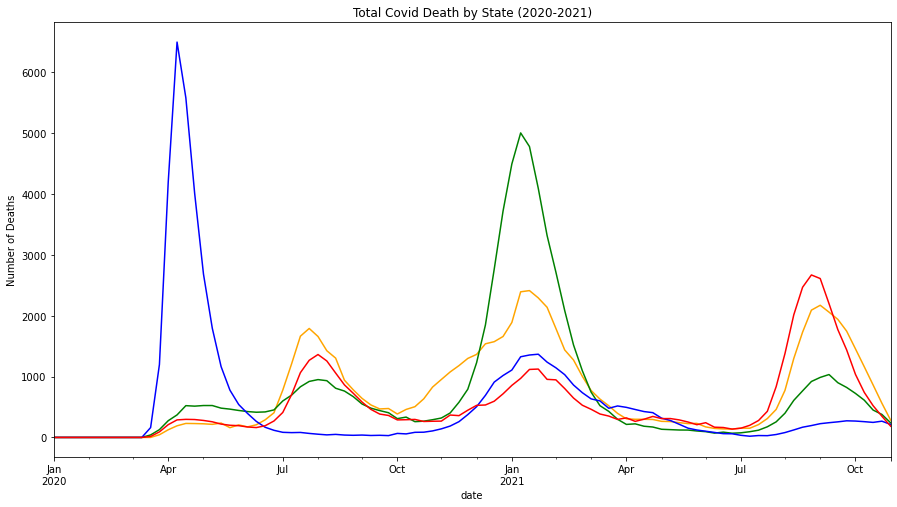

In [21]:
# Plot Covid Deaths by State

plt.figure(figsize = (15,8))
plt.title("Total Covid Death by State (2020-2021)")
plt.ylabel("Number of Deaths")
Texas["covid_19_u071_underlying_cause_of_death"].plot(color = 'orange')
California["covid_19_u071_underlying_cause_of_death"].plot(color = 'green')
NewYork["covid_19_u071_underlying_cause_of_death"].plot(color = 'blue')
Florida["covid_19_u071_underlying_cause_of_death"].plot(color = 'red')

<AxesSubplot:title={'center':'Percent Covid Death by State (2020-2021)'}, xlabel='date', ylabel='Percent Covid Death (%)'>

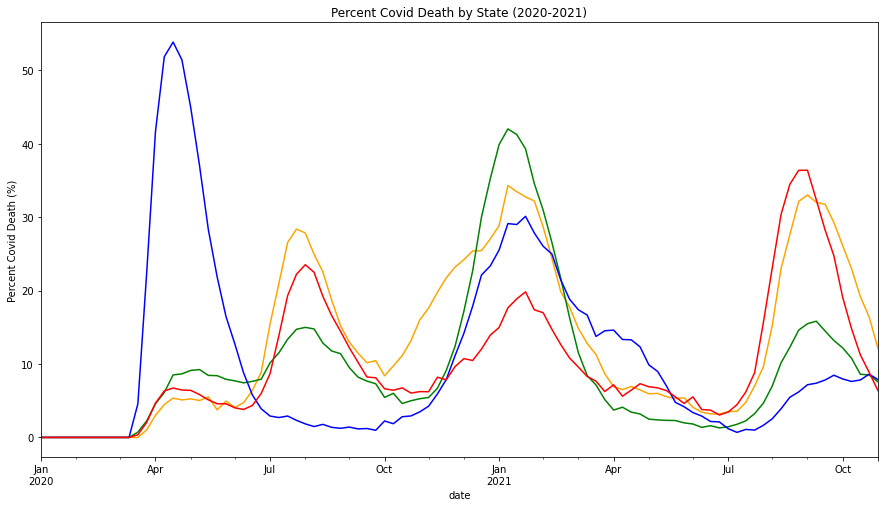

In [22]:
# Plot Percent Cvid Death by state

plt.figure(figsize = (15,8))
plt.title("Percent Covid Death by State (2020-2021)")
plt.ylabel("Percent Covid Death (%)")
Texas["percent_covid_death"].plot(color = 'orange')
California["percent_covid_death"].plot(color = 'green')
NewYork["percent_covid_death"].plot(color = 'blue')
Florida["percent_covid_death"].plot(color = 'red')

<BarContainer object of 4 artists>

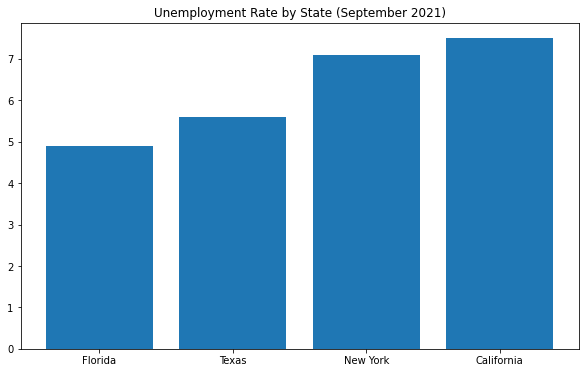

In [19]:
# Unemployment rates from U.S. BUREAU OF LABOR STATISTICS: https://www.bls.gov/web/laus/laumstrk.htm#laumstrk.f.p
# Data is for September 2021

state = ["Florida", "Texas", "New York", "California"]
unemployment_rate = [4.9, 5.6, 7.1, 7.5]
plt.figure(figsize = (10,6))
plt.title("Unemployment Rate by State (September 2021)")
plt.bar(state, unemployment_rate)